***
# Analysis of the Palmer penguins dataset
***


## BACKGROUND

The analysis started off by importing the necessary libraries needed for data analysis, exploration, manipulation and visualization and the [Palmer penguins dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv). The palmer penguin dataset has 344 rows and 7 columns and each of the row represents a penguin included in the study. The  dataset consists of three species of penguins; Adelie, Gentoo and Chinstrap found in Biscoe, Dream and Torgersen Islands in Palmer Archipelago, Antarctica.


[Palmer Penguin body parts](file:///C:/Users/great/Desktop/pands/pands-mywork/penguins%20with%20labels.webp)

### Libraries/Prerequisites
Pandas was used for exploring the dataframe, Numpy - numerical arrays was utilized for data analysis while Matplotlib and seaborn was used for plotting data, Scipy for Zscore.


In [1]:
#importing the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_theme() #setting seaborn as default style for plots when using matplotlib
print (np.__version__)

1.24.3


In [2]:
#importing the raw penguin dataset using pandas and assigns the resulting dataframe to the variable penguin

palmer_penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
palmer_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Data Exploration and understanding of the data structure
The data head and tail functions were used for a quick scan of the beginning and end of the data. The to_string function was used to present the data in a scrollable format. A summary statistics of the data was performed with  the describe function to get an overview of the numerical variable. The data information showed that the dtaset has 7 variables, 3 of which are of the object data type and 4 of the float type. Two of the 344 measured bill length, bill depth, flipper length and body mass are of the null type and 11 out of the sex variable.

In [3]:
# diplaying the first 5 rows of the data

print(palmer_penguins.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [4]:
# displaying the last 5 rows of the dataset
print (palmer_penguins.tail())


    species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
339  Gentoo  Biscoe             NaN            NaN                NaN   
340  Gentoo  Biscoe            46.8           14.3              215.0   
341  Gentoo  Biscoe            50.4           15.7              222.0   
342  Gentoo  Biscoe            45.2           14.8              212.0   
343  Gentoo  Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  


In [5]:
#converts the data set to string and presents it in a scrollable pattern
print (palmer_penguins.to_string()) 

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0       Adelie  Torgersen            39.1           18.7              181.0       3750.0    MALE
1       Adelie  Torgersen            39.5           17.4              186.0       3800.0  FEMALE
2       Adelie  Torgersen            40.3           18.0              195.0       3250.0  FEMALE
3       Adelie  Torgersen             NaN            NaN                NaN          NaN     NaN
4       Adelie  Torgersen            36.7           19.3              193.0       3450.0  FEMALE
5       Adelie  Torgersen            39.3           20.6              190.0       3650.0    MALE
6       Adelie  Torgersen            38.9           17.8              181.0       3625.0  FEMALE
7       Adelie  Torgersen            39.2           19.6              195.0       4675.0    MALE
8       Adelie  Torgersen            34.1           18.1              193.0       3475.0     NaN
9       Adelie  Torgersen     

In [6]:
# displays infromation on the data types and count

palmer_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Descriptive Statistics of the Palmer Penguin Dataset
The dataset consist of penguins(n = 344) located in three different islands namely Biscoe (n = 168), Dream (n = 124) and Torgersen (n = 52). The penguins are of three different species Adelie (n = 152), Gentoo (n = 124) and Chinstrap (n = 68). These included male (n = 168), female (n = 165) and other penguins with missing entries for the sex variable (n = 8.).


In [7]:
# Counting the penguin species
palmer_penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [8]:
#Counting the penguin species
palmer_penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [9]:
# Counting the sex of the penguins
palmer_penguins['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

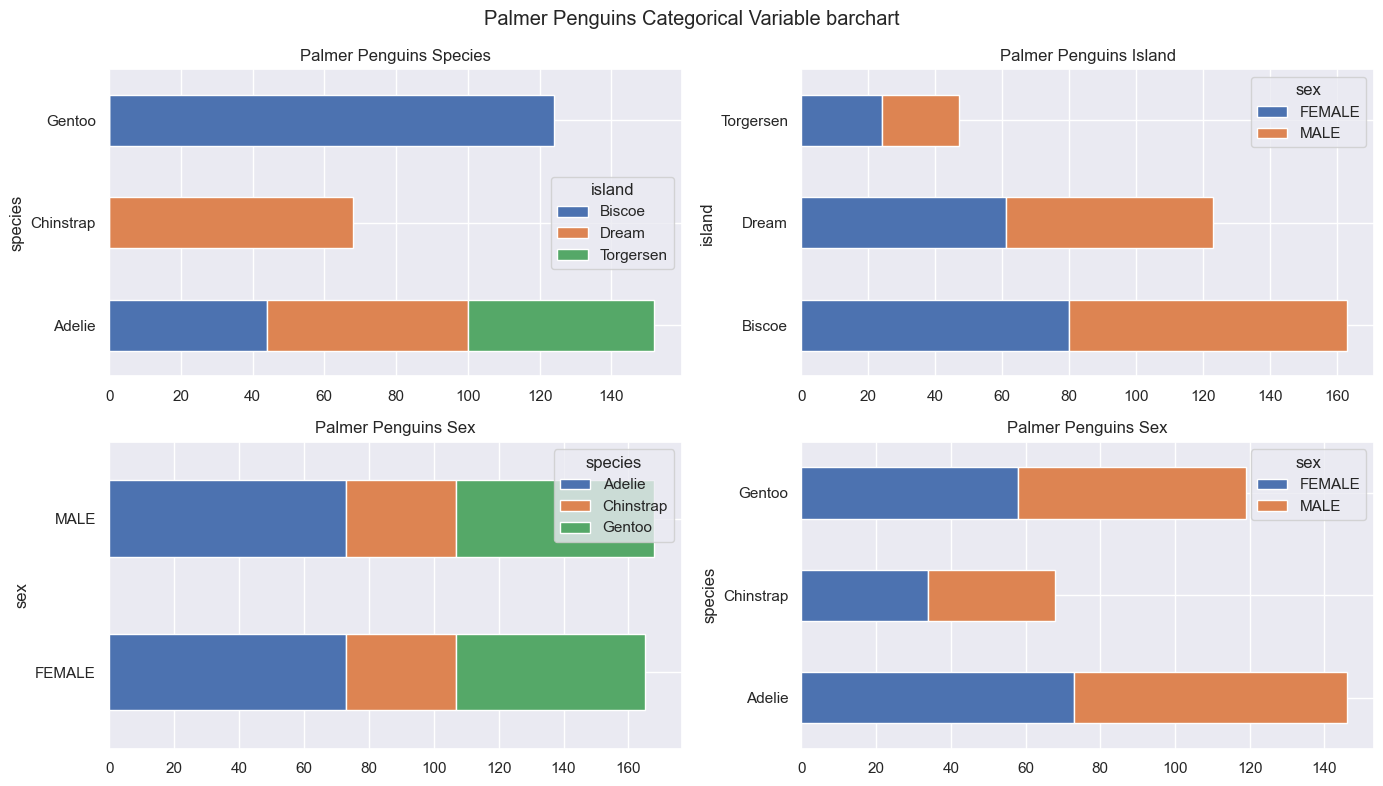

In [10]:
# Grouping the data and counting the occurrences of each subgroup
species_island_counts = palmer_penguins.groupby(['species', 'island']).size().unstack()
island_sex_counts = palmer_penguins.groupby(['island', 'sex']).size().unstack()
sex_species_counts = palmer_penguins.groupby(['sex', 'species']).size().unstack()
species_sex_counts = palmer_penguins.groupby(['species', 'sex']).size().unstack()

# Setting up the subplots
fig, ax = plt.subplots(2, 2, figsize=(14, 8))  # 3 rows, 1 column
fig.suptitle('Palmer Penguins Categorical Variable barchart')

# Plot 1: Species barplot with stacked bars
species_island_counts.plot(kind='barh', stacked=True, ax=ax[0,0])
ax[0, 0].set_title('Palmer Penguins Species')

# Plot 2: Island barplot with stacked bars
island_sex_counts.plot(kind='barh', stacked=True, ax=ax[0, 1])
ax[0, 1].set_title('Palmer Penguins Island')

# Plot 3: Sex barplot with stacked bars
sex_species_counts.plot(kind='barh', stacked=True, ax=ax[1, 0])
ax[1, 0].set_title('Palmer Penguins Sex')

# Plot 3: Sex barplot with stacked bars
species_sex_counts.plot(kind='barh', stacked=True, ax=ax[1, 1])
ax[1, 1].set_title('Palmer Penguins Sex')

plt.tight_layout()
plt.show()

 barchart is the great for plotting categorical variables. The frequency table above showed that the Adelie penguins has the highest population in the dataset, followed by the Gentoo penguins and then the Chinstrap penguins. The Adelie penguins were from all three Islands; Togerson, Dream and Biscoe. Chinstrap Penguins were only from the dream island while the gentoo penguins were from the biscoe island. This finding is is in agreement of a similar analysis on the dataset [Fortune, 2022](https://medium.com/@Fortune_/visualizing-the-palmerpenguins-dataset-d3d70bb619b4.)
 This raises the question on impact of environmental factors in biodiversity, as what possible feature do the Adelie penguin has that enables it to adapt to all three Islands?. Almost about half of the penguins in the study were from Biscoe Island. The proportion of male to female penguins is almost equal across the three islands with the male penguin populatiion being slightly higher.

#### Summary Statistics of the Palmer penguins' numerical variables
The table below is the summary statistics for the bill length, bill depth, flipper length and body mass of the penguins;


In [11]:
# Palmer penguins descriptives for numerical variables
palmer_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#### Univariate Analysis
A hisogram of the numerical variables was plotted to understand the distribution of the dataset. This has been reported by [Yash](https://medium.com/codex/exploratory-data-analysis-a-roadmap-for-cleaning-3e01a0d694) to be an important aspect of exploratory data analysis.

<Axes: xlabel='body_mass_g', ylabel='Count'>

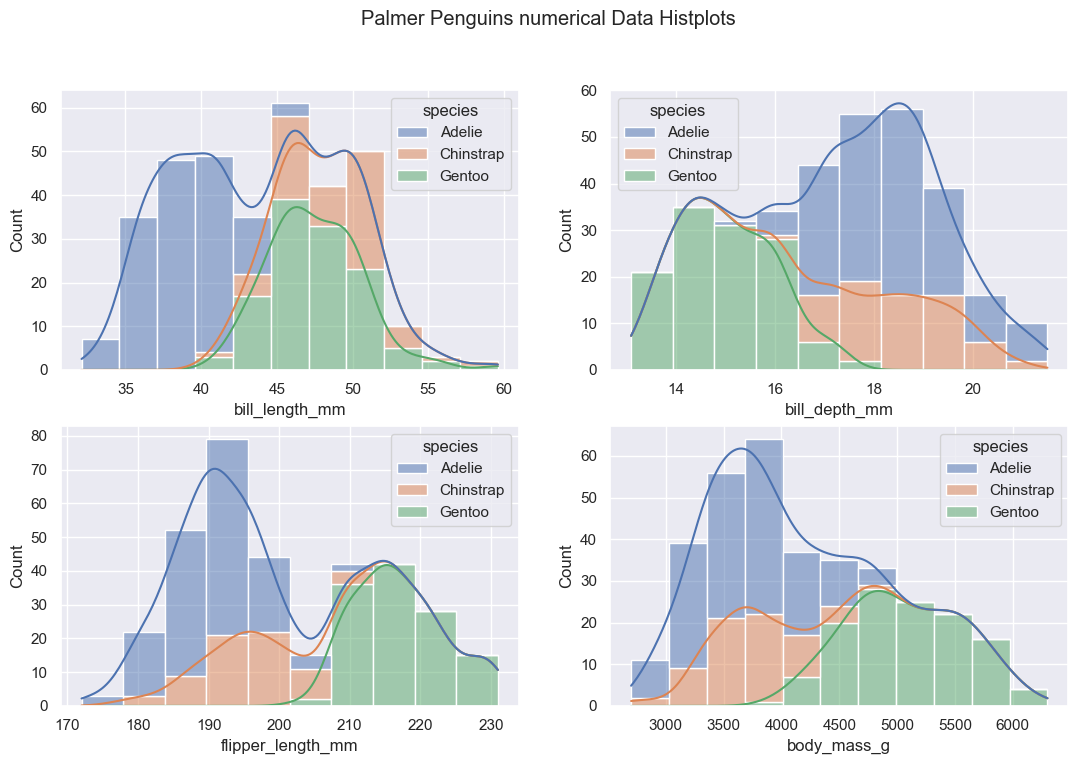

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins numerical Data Histplots')

#creating a histplot for the numerical variables
sns.histplot(data=palmer_penguins, x='bill_length_mm', hue='species',  multiple='stack', kde=True, ax = ax [0, 0])
sns.histplot(data=palmer_penguins, x='bill_depth_mm', hue='species',   multiple='stack', kde=True, ax = ax [0, 1])
sns.histplot(data=palmer_penguins, x='flipper_length_mm',hue='species',multiple='stack', kde=True, ax = ax [1, 0])
sns.histplot(data=palmer_penguins, x='body_mass_g', hue='species', multiple='stack',kde=True, ax = ax [1, 1])

<Axes: xlabel='body_mass_g', ylabel='Count'>

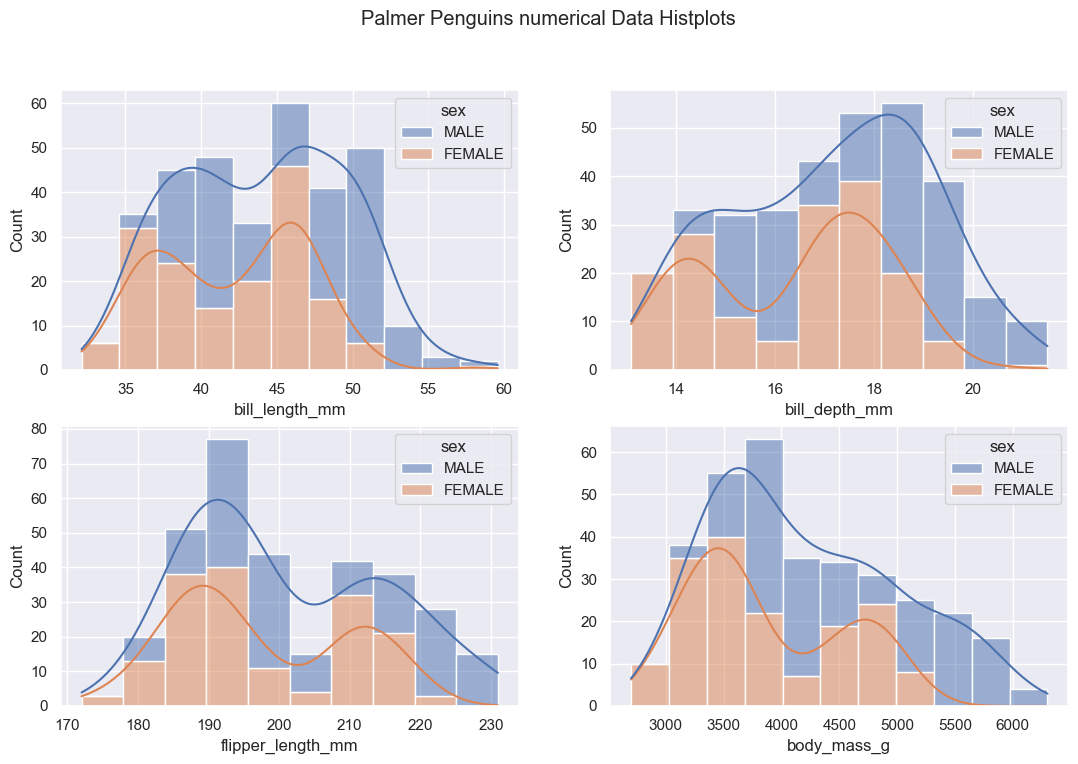

In [13]:
fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins numerical Data Histplots')

#creating a histplot for the numerical variables
sns.histplot(data=palmer_penguins, x='bill_length_mm', hue='sex', multiple='stack', kde=True, ax = ax [0, 0])
sns.histplot(data=palmer_penguins, x='bill_depth_mm', hue='sex', multiple='stack', kde=True, ax = ax [0, 1])
sns.histplot(data=palmer_penguins, x='flipper_length_mm',hue='sex',multiple='stack', kde=True, ax = ax [1, 0])
sns.histplot(data=palmer_penguins, x='body_mass_g', hue='sex', multiple='stack',kde=True, ax = ax [1, 1])

From the histogram, it can be deduced that male penguins in the dataset has longer bill length, flipper length and wider bill depth than the female penguins. The males penguins also weigh more than the females


<Axes: xlabel='body_mass_g', ylabel='Count'>

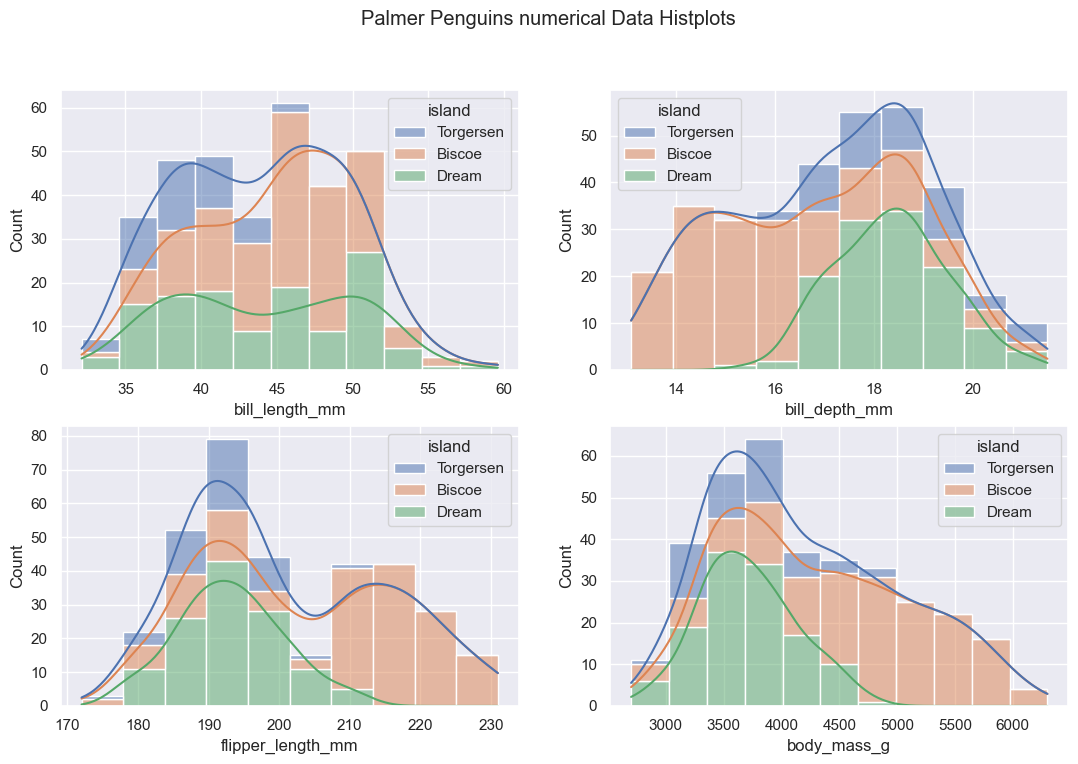

In [14]:
fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins numerical Data Histplots')

#creating a histplot for the numerical variables
sns.histplot(data=palmer_penguins, x='bill_length_mm', hue='island', multiple='stack', kde=True, ax = ax [0, 0])
sns.histplot(data=palmer_penguins, x='bill_depth_mm', hue='island', multiple='stack', kde=True, ax = ax [0, 1])
sns.histplot(data=palmer_penguins, x='flipper_length_mm',hue='island',multiple='stack', kde=True, ax = ax [1, 0])
sns.histplot(data=palmer_penguins, x='body_mass_g', hue='island', multiple='stack',kde=True, ax = ax [1, 1])

## Data Cleaning and  Manipulation
A copy of the original data was created before cleaning up the data as to ensure that the integrity of the original data was preserved.  Scrolling through the datsets showed that the nulltype data also known as missing values were depicted in the pandas datatframe with NAN (Not a number).
Missing values in a dataset may lead to analytical so it is essential that these are dealt with efficiently (add citation ref). These values were identified using the 'isna function'. The sex column has the highest number of missing values while rows' 3 and 339 were missing a lot of variables awhich may be due to incomplete entries. The 11 missing values under sex were substituted with the mode of the sex variable while rows 3 and 339 were dropped.


In [15]:
# Creating a copy of the dataset before manipulating the data
penguins = palmer_penguins.copy()


In [16]:
# Checking for missings values in the dataset

penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [17]:
# Selecting all the rows with NAN in the penguins dataset
penguins[penguins.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


### Dealing with missing values
The sex column has the highest number of missing values while rows' 3 and 339 were missing a lot of variables and may be incomplete entries. The NAN in the sex column was replaced by data imputation with the mode while rows 3 and 339 were dropped.

In [18]:

# Replacing the NAN in the sex column with the mode which is male

print (penguins['sex'].mode()[0])

penguins['sex'] = penguins['sex'].fillna(penguins['sex'].mode()[0])

MALE


In [19]:
#rerunning the isna showed that only two rows has the NAN
penguins[penguins.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,MALE
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,MALE


In [20]:
# Dropping the rows with multiple NAN

penguins = penguins.dropna()
penguins                     # Recheck: 342 rows by 7 columns as against the original 344 rows by 7 columns


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Dealing with duplicates
The palmer penguin dataset has no duplicate rows.

In [21]:
# Checking for duplicates      
print (penguins.duplicated().sum())

0


### Dealing with Outliers
#### Boxplot

The boxplot identified six numerical measurements to be outliers within the palmer penguin species. One outlier each for the Gentoo Penuins' bill length measurement and one for the Adelie Penguins' bill depth. The remaining four  each were two meeasurements each for flipper length and body mass for Adelie and Chinstrap species respectively. 

<Axes: xlabel='species', ylabel='body_mass_g'>

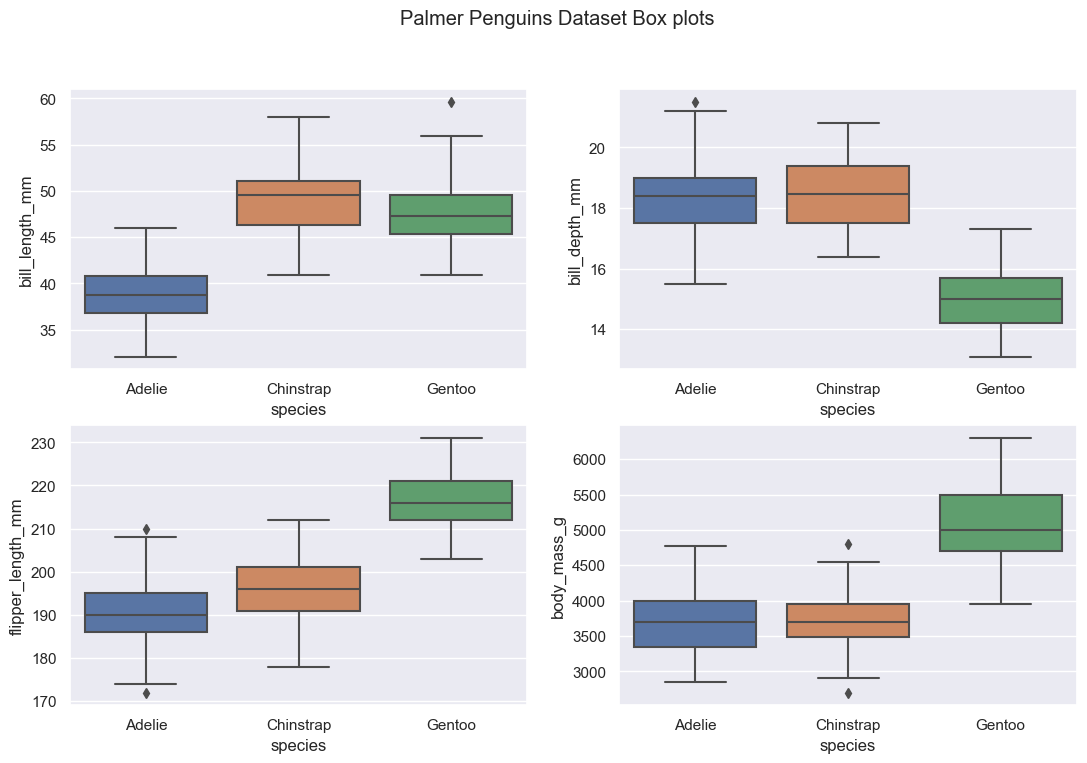

In [22]:
# Boxplot
fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins Dataset Box plots')

#creating chart for each subplot
sns.boxplot(data=penguins, x='species', y='bill_length_mm', ax = ax [0, 0])
sns.boxplot(data=penguins, x='species', y='bill_depth_mm', ax = ax [0, 1])
sns.boxplot(data=penguins, x='species', y='flipper_length_mm', ax = ax [1, 0])
sns.boxplot(data=penguins, x='species', y='body_mass_g', ax = ax [1, 1])

<Axes: xlabel='species', ylabel='body_mass_g'>

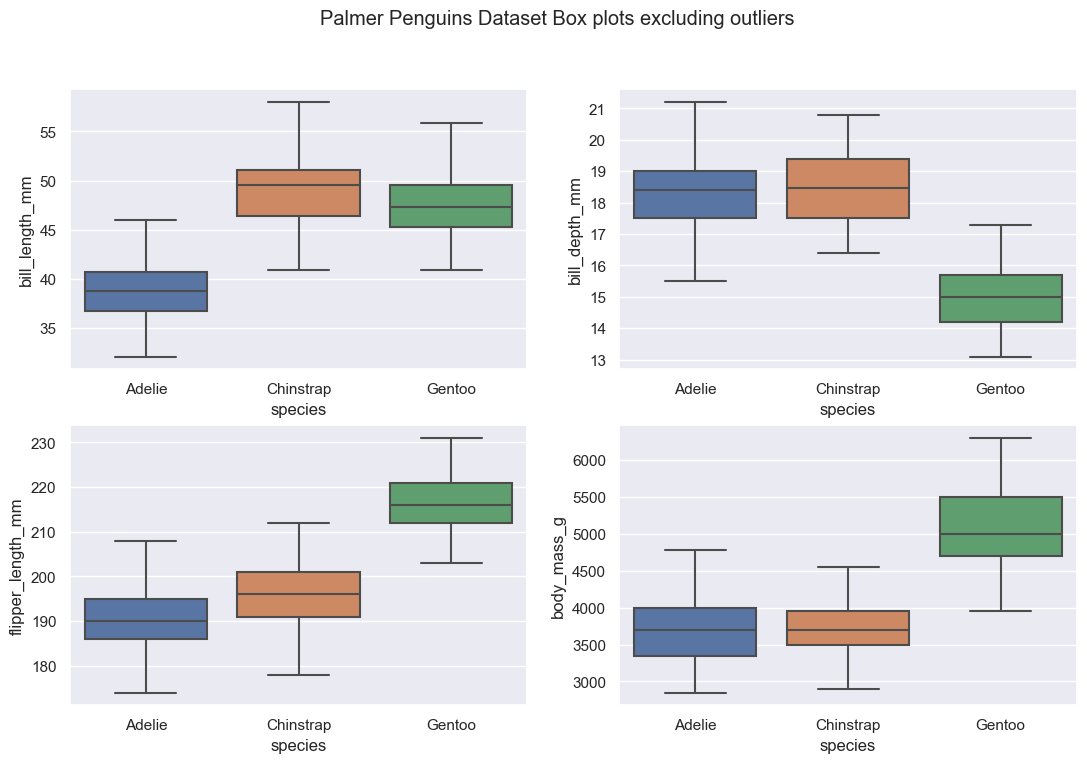

In [23]:
# Boxplots with the outliers removed
fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins Dataset Box plots excluding outliers')

#creating chart for each subplot
sns.boxplot(data=penguins, x='species', y='bill_length_mm', showfliers = False, ax = ax [0, 0])
sns.boxplot(data=penguins, x='species', y='bill_depth_mm', showfliers = False,ax = ax [0, 1])
sns.boxplot(data=penguins, x='species', y='flipper_length_mm', showfliers = False, ax = ax [1, 0])
sns.boxplot(data=penguins, x='species', y='body_mass_g', showfliers = False, ax = ax [1, 1])

# INTERQUARTILE RANGE

#### Slicing the dataset for Z-score analysis on the species' subset numerical variable

In [24]:
penguins['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [25]:
#slicing and saving the Adelie species to a new variable
penguins_Adelie = penguins[penguins['species']=='Adelie']
penguins_Adelie.value_counts()   # to compare with the original under species


species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Adelie   Biscoe     34.5            18.1           187.0              2900.0       FEMALE    1
         Dream      41.5            18.5           201.0              4000.0       MALE      1
                    42.3            21.2           191.0              4150.0       MALE      1
                    43.2            18.5           192.0              4100.0       MALE      1
                    44.1            19.7           196.0              4400.0       MALE      1
                                                                                            ..
                    36.0            17.9           190.0              3450.0       FEMALE    1
                                    18.5           186.0              3100.0       FEMALE    1
                    36.2            17.3           187.0              3300.0       FEMALE    1
                    36.3            19.5           190.

In [26]:
penguins_Gentoo = penguins[penguins['species']=='Gentoo']
penguins_Gentoo.value_counts()


species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Gentoo   Biscoe  40.9            13.7           214.0              4650.0       FEMALE    1
                 49.6            15.0           216.0              4750.0       MALE      1
                 49.5            16.1           224.0              5650.0       MALE      1
                 49.4            15.8           216.0              4925.0       MALE      1
                 49.3            15.7           217.0              5850.0       MALE      1
                                                                                         ..
                 45.5            15.0           220.0              5000.0       MALE      1
                                 14.5           212.0              4750.0       FEMALE    1
                                 13.9           210.0              4200.0       FEMALE    1
                                 13.7           214.0              4650.0       FEMAL

In [27]:
penguins_Chinstrap = penguins[penguins['species']=='Chinstrap']
penguins_Chinstrap.value_counts()

species    island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Chinstrap  Dream   40.9            16.6           187.0              3200.0       FEMALE    1
                   50.5            19.6           201.0              4050.0       MALE      1
                   50.9            19.1           196.0              3550.0       MALE      1
                                   17.9           196.0              3675.0       FEMALE    1
                   50.8            19.0           210.0              4100.0       MALE      1
                                                                                           ..
                   48.5            17.5           191.0              3400.0       MALE      1
                   49.0            19.5           210.0              3950.0       MALE      1
                                   19.6           212.0              4300.0       MALE      1
                   49.2            18.2           195.0          

#### Summary statistics of the numerical variables of the species subset of the Palmer Penguins

In [28]:
penguins_Adelie.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [29]:
penguins_Gentoo.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


In [30]:
penguins_Chinstrap.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


### Zscore Analysis of the numerical variables of the species subset of the Palmer Penguins
Z-score analysis was performed on the Adelie, Gentoo and Chintrap  penguin's bill length, bill depth, flipper length and body mass. Only 2 outliers were present, an Adelie penguin with with a flipper length of 210 mm  and a Z-score of 3.075 as against the group mean flipper length of 189.95 mm. the second was a Gentoo penguin with a bill length of  59.3 mm and a z-score of 3.94 as against the group bill length mean of 47.5 mm.

In [31]:
# Creating a numerical subset of the Adelie penguins columns as a list
peng_Adelie = penguins_Adelie[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Z-score outlier test on the pen
Adelie_Zscore = stats.zscore(peng_Adelie)

print (Adelie_Zscore.to_string())


     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0          0.116256       0.291636          -1.373728     0.107949
1          0.266939      -0.780427          -0.606595     0.217348
2          0.568306      -0.285629           0.774246    -0.986034
4         -0.787845       0.786435           0.467393    -0.548441
5          0.191598       1.858499           0.007112    -0.110847
6          0.040914      -0.450562          -1.373728    -0.165547
7          0.153927       1.033834           0.774246     2.131819
8         -1.767288      -0.203162           0.467393    -0.493742
9          1.208711       1.528633           0.007112     1.201933
10        -0.373466      -1.027827          -0.606595    -0.876636
11        -0.373466      -0.862894          -1.527155    -0.001449
12         0.869673      -0.615495          -1.220302    -1.095433
13        -0.072099       2.353297           0.160539     0.217348
14        -1.578933       2.270831           1.234527     1.53

In [32]:
#printing off dataframes with outliers with Z-score outside the +- 3 standard deviation
Outliers_Adelie = (Adelie_Zscore > 3) | (Adelie_Zscore < -3)
print(f"bill length outliers: {peng_Adelie[Outliers_Adelie['bill_length_mm']]}")
print(f"bill depth outliers: {peng_Adelie[Outliers_Adelie['bill_depth_mm']]}")
print(f"flipper length outliers: {peng_Adelie[Outliers_Adelie['flipper_length_mm']]}")
print(f"body mass outliers: {peng_Adelie[Outliers_Adelie['body_mass_g']]}")
print(Adelie_Zscore.at[129, 'flipper_length_mm'])

bill length outliers: Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []
bill depth outliers: Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []
flipper length outliers:      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
129            44.1           18.0              210.0       4000.0
body mass outliers: Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []
3.075647798563297


In [33]:
# Creating a numerical subset of the Gentoo penguins columns as a list
peng_Gentoo = penguins_Gentoo[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Z-score outlier test on the pen
Gentoo_Zscore = stats.zscore(peng_Gentoo)

print (Gentoo_Zscore.to_string())


     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
220       -0.457719      -1.823651          -0.957952    -1.147299
221        0.812928       1.348603           1.983880     1.242840
222        0.389379      -0.902674          -1.112785    -1.246888
223        0.812928       0.222965           0.125881     1.242840
224        0.030991      -0.493351          -0.338619     0.645305
225       -0.327396      -1.516659          -1.112785    -1.047710
226       -0.685784      -0.391020          -0.957952    -0.549764
227       -0.262235       0.325295           0.280714     0.246949
228       -1.369978      -1.618990          -1.267619    -1.346477
229       -0.229654       0.427626          -0.338619     0.147360
230       -2.151914      -1.311997          -0.493452    -0.848532
231        0.487121       1.143942          -0.183786     0.944073
232       -0.653203      -1.311997          -0.493452    -0.848532
233        0.291637      -0.391020          -0.648286     1.54

In [34]:
#printing off dataframes with outliers with Z-score outside the +- 3 standard deviation
Outliers_Gentoo = (Gentoo_Zscore > 3) | (Gentoo_Zscore < -3)
print(f"bill length outliers: {peng_Gentoo[Outliers_Gentoo['bill_length_mm']]}")
print(f"bill depth outliers: {peng_Gentoo[Outliers_Gentoo['bill_depth_mm']]}")
print(f"flipper length outliers: {peng_Gentoo[Outliers_Gentoo['flipper_length_mm']]}")
print(f"body mass outliers: {peng_Gentoo[Outliers_Gentoo['body_mass_g']]}")
print(Gentoo_Zscore.at[253, 'bill_length_mm']) #printing the zscore with the index of the outlier

bill length outliers:      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
253            59.6           17.0              230.0       6050.0
bill depth outliers: Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []
flipper length outliers: Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []
body mass outliers: Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []
3.9406726180782026


In [35]:
# Creating a numerical subset of the Chinstrap penguins columns as a list
peng_Chinstrap = penguins_Chinstrap[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Z-score outlier test on the pen
Chinstrap_Zscore = stats.zscore(peng_Chinstrap)

print (Gentoo_Zscore.to_string())

     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
220       -0.457719      -1.823651          -0.957952    -1.147299
221        0.812928       1.348603           1.983880     1.242840
222        0.389379      -0.902674          -1.112785    -1.246888
223        0.812928       0.222965           0.125881     1.242840
224        0.030991      -0.493351          -0.338619     0.645305
225       -0.327396      -1.516659          -1.112785    -1.047710
226       -0.685784      -0.391020          -0.957952    -0.549764
227       -0.262235       0.325295           0.280714     0.246949
228       -1.369978      -1.618990          -1.267619    -1.346477
229       -0.229654       0.427626          -0.338619     0.147360
230       -2.151914      -1.311997          -0.493452    -0.848532
231        0.487121       1.143942          -0.183786     0.944073
232       -0.653203      -1.311997          -0.493452    -0.848532
233        0.291637      -0.391020          -0.648286     1.54

In [36]:
#printing off dataframes with outliers with Z-score outside the +- 3 standard deviation
Outliers_Chinstrap = (Chinstrap_Zscore > 3) | (Chinstrap_Zscore < -3)
print(f"bill length outliers: {peng_Chinstrap[Outliers_Chinstrap['bill_length_mm']]}")
print(f"bill depth outliers: {peng_Chinstrap[Outliers_Chinstrap['bill_depth_mm']]}")
print(f"flipper length outliers: {peng_Chinstrap[Outliers_Chinstrap['flipper_length_mm']]}")
print(f"body mass outliers: {peng_Chinstrap[Outliers_Chinstrap['body_mass_g']]}")


bill length outliers: Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []
bill depth outliers: Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []
flipper length outliers: Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []
body mass outliers: Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []


### Correlation Analysis


In [37]:
#relationship between 

## DATA ANALYSIS
The original data was loaded in as a variable 'palmer_penguins', however the cleaned up data was saved to the variable 'penguins' which was used for the of the analysis 

In [38]:
#correlation between body mass and sex
#specie and body mass, flipper legth, bill legth etc

### Biivariate Analysis
The [Seaborn pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) provides a visual representation of pairwise relationship between variables. The KDE diagonal plot shows the univariate distribution of each of the variable in the dataset

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.02, 'Penguin dataset pairwise plot')

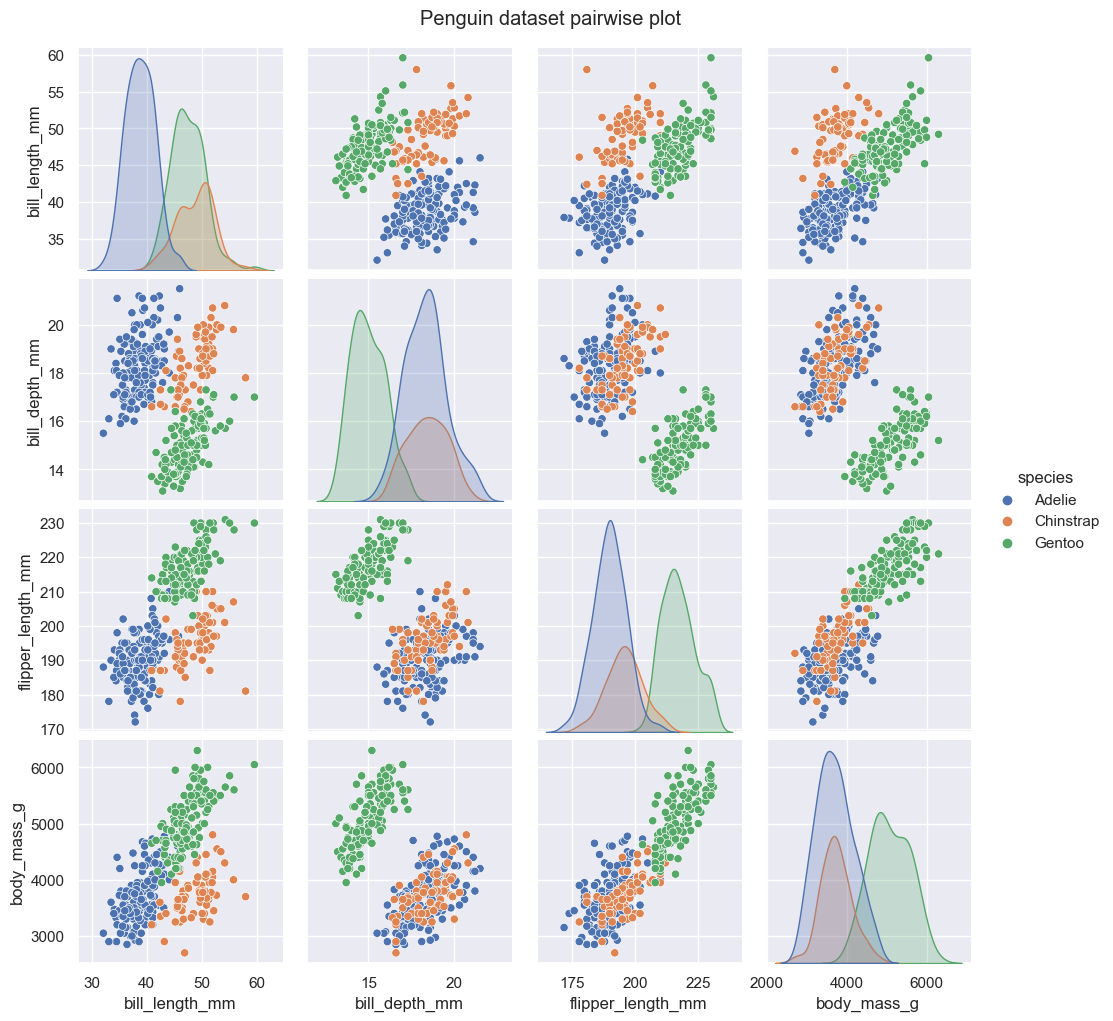

In [39]:
# creates a pairplot of the cleaned data

sns.pairplot(penguins, hue = 'species')

plt.suptitle('Penguin dataset pairwise plot', y=1.02)

#plt.tight_layout() #adjust and fit parameters perfectly

### Correlation Analysis
**Null Hypothesis:** There is a relationship between the the flipper length and the body mass across the palmer penguin population. The shorter the flipper length of a penguin, the higher the body weight.
A scatterplot of the flipper length and the body mass was used below to determine if the hypothesis is to be accepted or rejected.


0.8712017673060111


ImportError: cannot import name 'lingress' from 'scipy' (c:\ProgramData\anaconda3\Lib\site-packages\scipy\__init__.py)

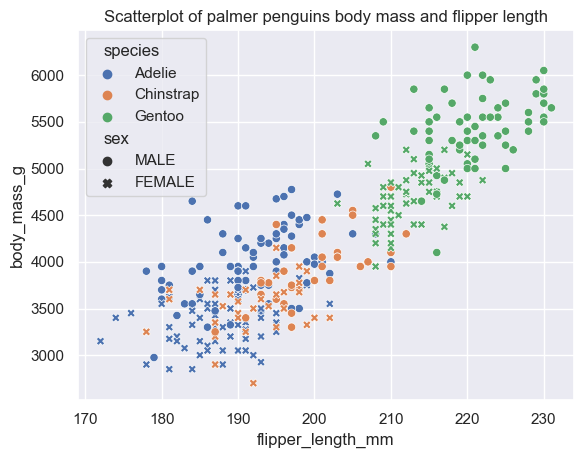

In [58]:
# Scatterplot
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='species', style = 'sex')
plt.title ('Scatterplot of palmer penguins body mass and flipper length')

#calculating the correlation coefficient
bm_fl_corr_coefficient = penguins['flipper_length_mm'].corr(penguins['body_mass_g'])
print (bm_fl_corr_coefficient)
#plt.plot(penguins['flipper_length_mm'], penguins['flipper_length_mm'] * bm_fl_corr_coefficient, color='red', label=f'Correlation: {bm_fl_corr_coefficient:.2f}')


m, c = np.polyfit (penguins['flipper_length_mm'], penguins['body_mass_g'], 1)

from scipy import lingress
# Fit linear regression model
slope, intercept, r_value, p_value, std_err = linregress(penguins['flipper_length_mm'], penguins['body_mass_g'])

# Create regression line
x_values = np.array([penguins['flipper_length_mm'].min(), penguins['flipper_length_mm'].max()])
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red', label=f'Regression: slope={slope:.2f}')

# Show legend
plt.legend()

<Axes: xlabel='species', ylabel='body_mass_g'>

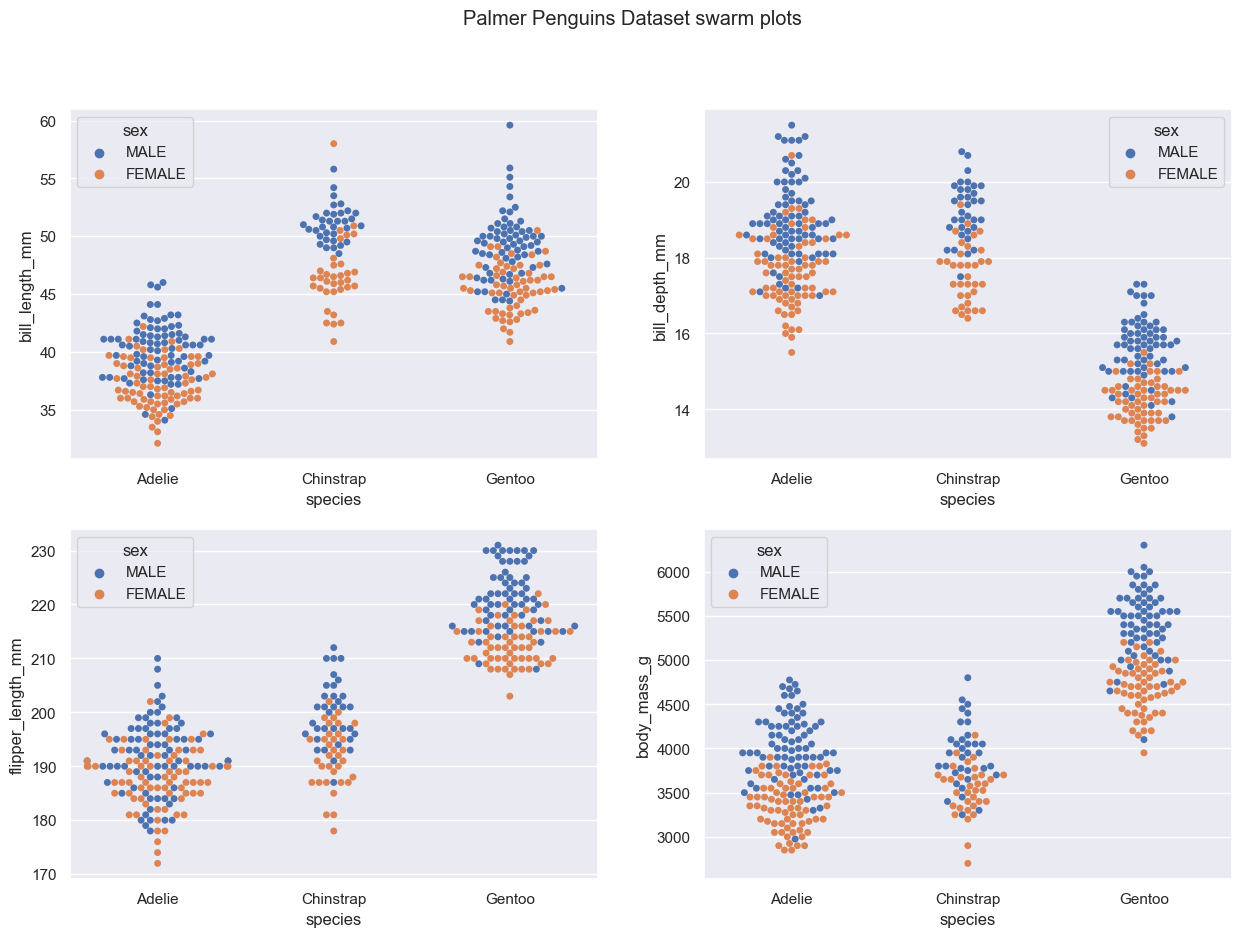

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
fig.suptitle ('Palmer Penguins Dataset swarm plots')

#creating chart for each subplot
sns.swarmplot(data=penguins, x='species', y='bill_length_mm', hue = 'sex', ax = ax [0, 0])
sns.swarmplot(data=penguins, x='species', y='bill_depth_mm', hue = 'sex', ax = ax [0, 1])
sns.swarmplot(data=penguins, x='species', y='flipper_length_mm', hue = 'sex', ax = ax [1, 0])
sns.swarmplot(data=penguins, x='species', y='body_mass_g', hue = 'sex', ax = ax [1, 1])



<Axes: xlabel='species', ylabel='body_mass_g'>

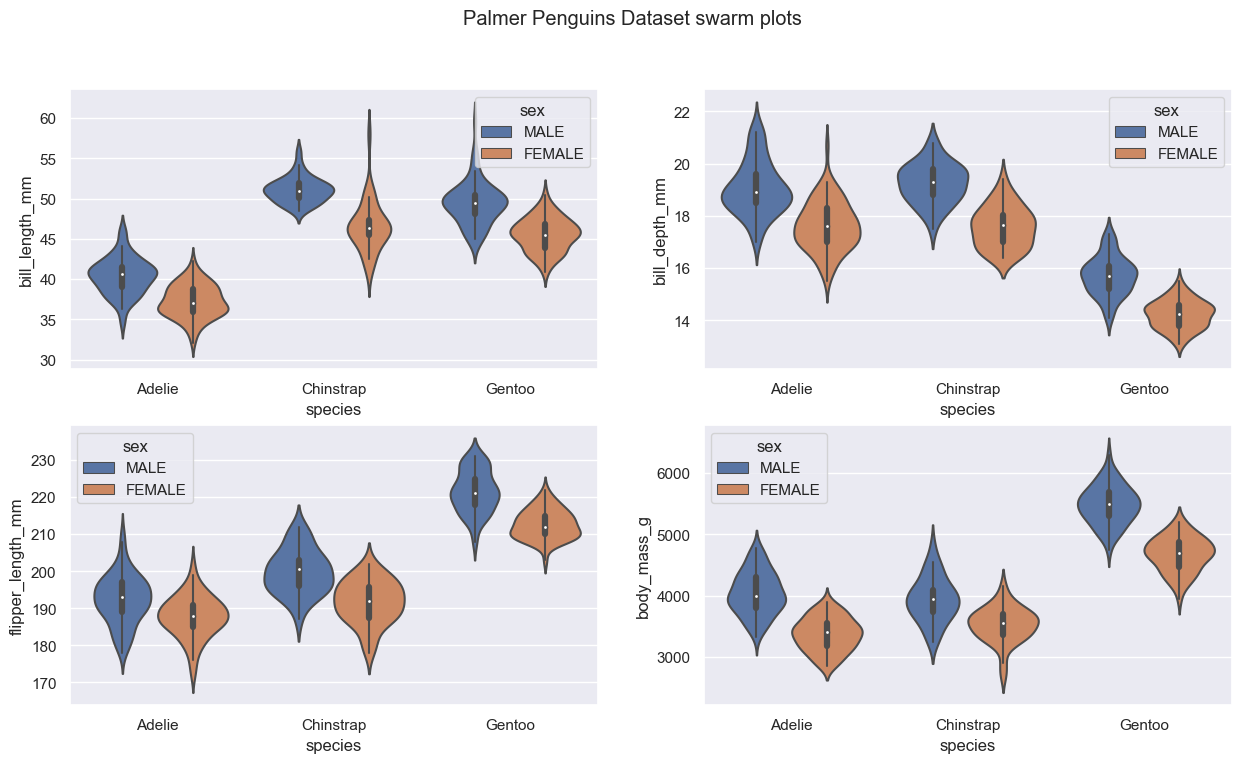

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
fig.suptitle ('Palmer Penguins Dataset swarm plots')

#creating chart for each subplot
sns.violinplot(data=penguin, x='species', y='bill_length_mm', hue = 'sex',  ax = ax [0, 0])
sns.violinplot(data=penguin, x='species', y='bill_depth_mm', hue = 'sex', ax = ax [0, 1])
sns.violinplot(data=penguin, x='species', y='flipper_length_mm', hue = 'sex', ax = ax [1, 0])
sns.violinplot(data=penguin, x='species', y='body_mass_g', hue = 'sex', ax = ax [1, 1])

<Axes: xlabel='species', ylabel='body_mass_g'>

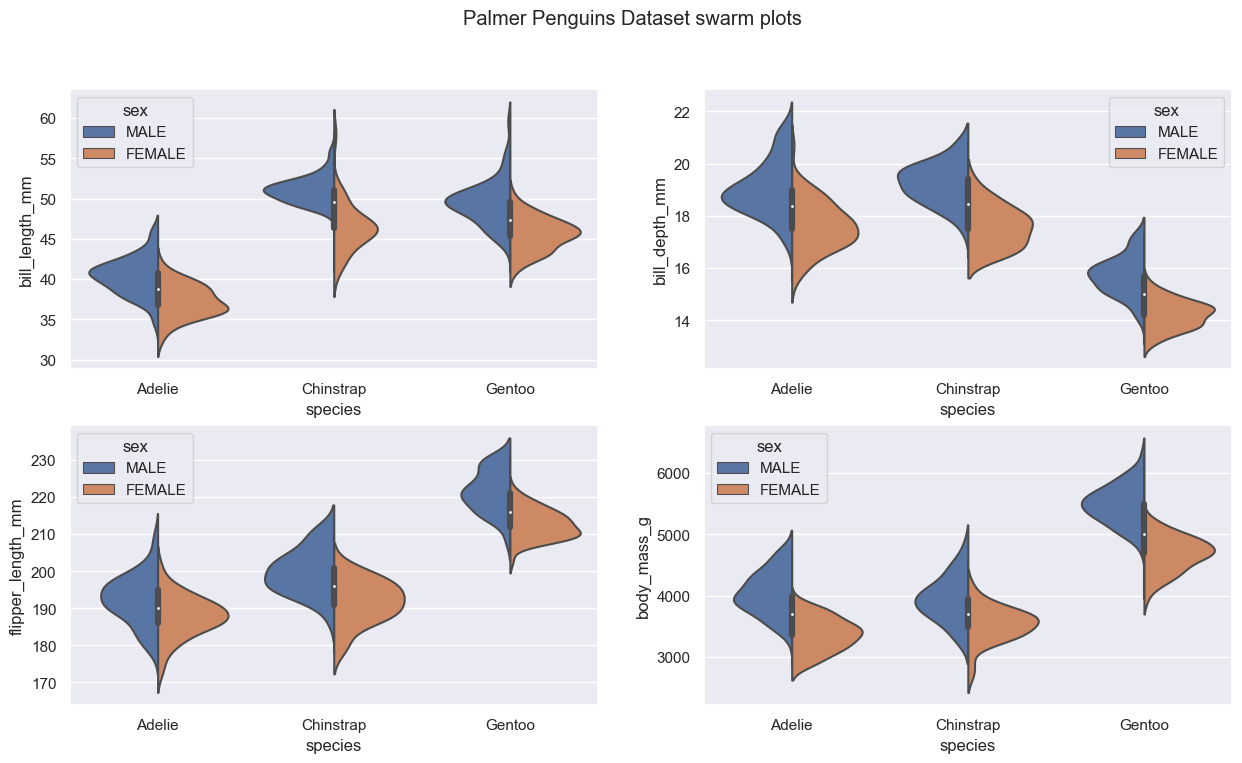

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
fig.suptitle ('Palmer Penguins Dataset swarm plots')

#creating chart for each subplot
sns.violinplot(data=penguin, x='species', y='bill_length_mm', hue = 'sex', split = True, ax = ax [0, 0])
sns.violinplot(data=penguin, x='species', y='bill_depth_mm', hue = 'sex', split = True, ax = ax [0, 1])
sns.violinplot(data=penguin, x='species', y='flipper_length_mm', hue = 'sex', split = True, ax = ax [1, 0])
sns.violinplot(data=penguin, x='species', y='body_mass_g', hue = 'sex', split = True, ax = ax [1, 1])



<Axes: xlabel='body_mass_g', ylabel='species'>

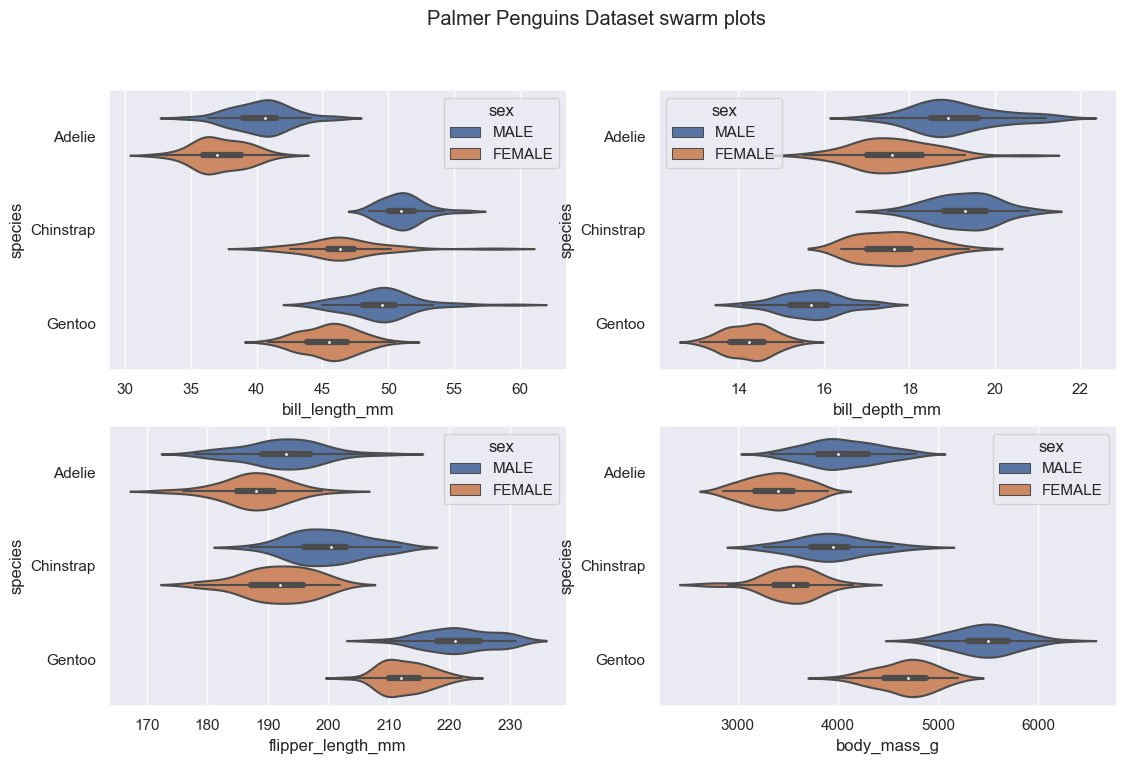

In [ ]:
#creating chart for each subplot

fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins Dataset swarm plots')

sns.violinplot(data=penguin,  x='bill_length_mm', y='species', hue = 'sex', ax = ax [0, 0])
sns.violinplot(data=penguin,  x='bill_depth_mm', y='species', hue = 'sex', ax = ax [0, 1])
sns.violinplot(data=penguin,  x='flipper_length_mm', y='species', hue = 'sex', ax = ax [1, 0])
sns.violinplot(data=penguin,  x='body_mass_g', y='species', hue = 'sex', ax = ax [1, 1])


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


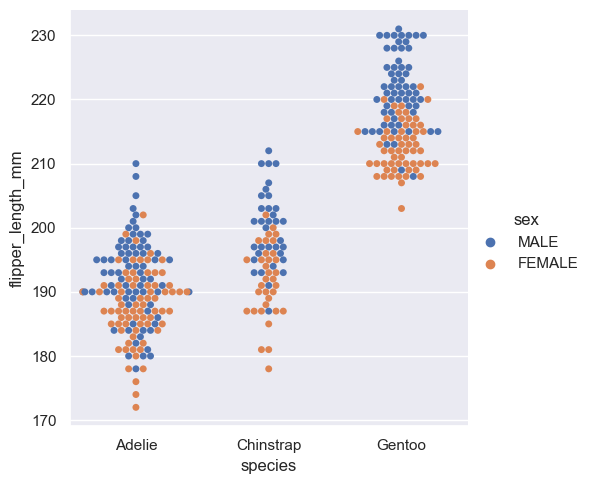

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'flipper_length_mm', hue = 'sex', kind = 'swarm')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


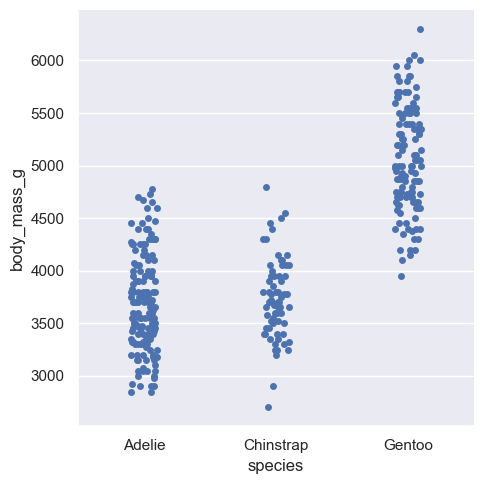

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'body_mass_g')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


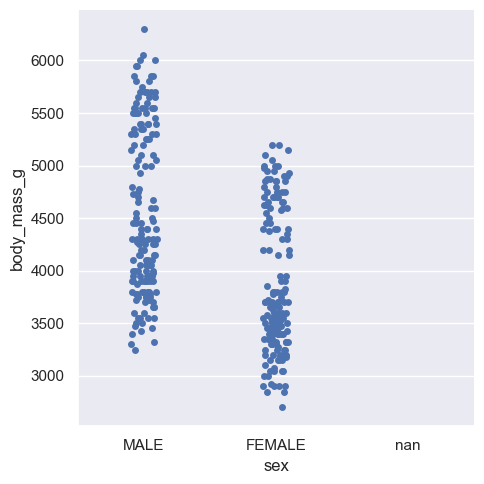

In [ ]:
sns.catplot(data=penguin, x= 'sex', y= 'body_mass_g')

### correlations
### mean weight for each species
male weighs more than female
male

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


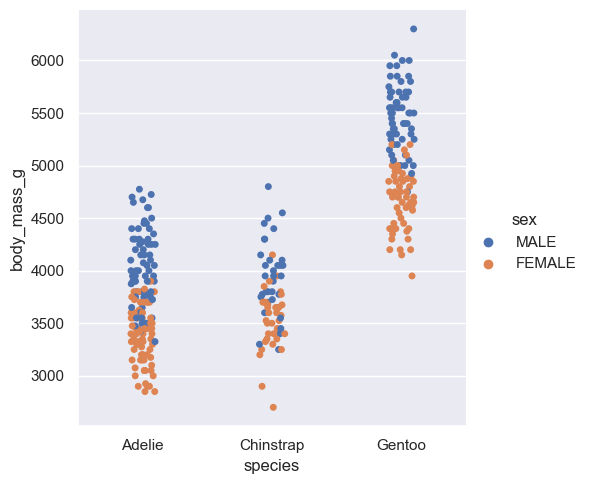

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'body_mass_g', hue = 'sex')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


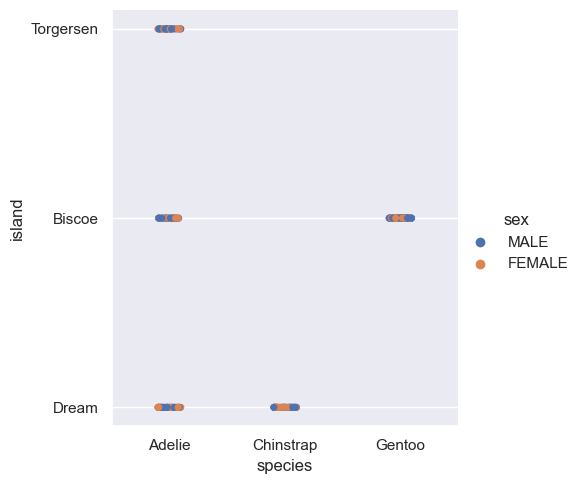

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'island', hue = 'sex') 


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


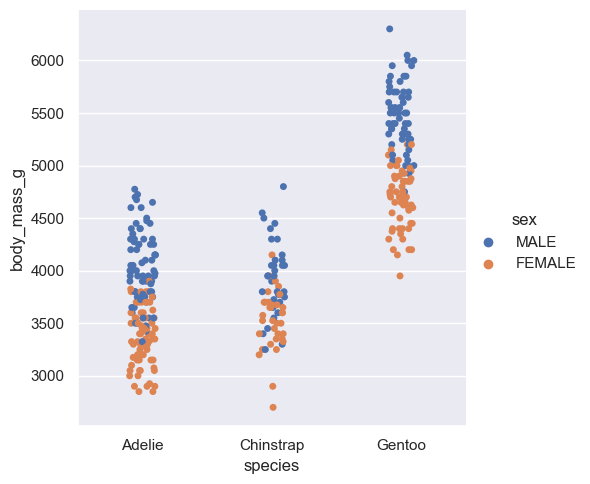

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'body_mass_g', hue = 'sex') 

In [ ]:
#correlation between specie and body mass
#correlation between sex and body mass

In [ ]:
#getting the numpy array
blength = blen.to_numpy()
print (blength)

[39.1 39.5 40.3  nan 36.7 39.3 38.9 39.2 34.1 42.  37.8 37.8 41.1 38.6
 34.6 36.6 38.7 42.5 34.4 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5
 37.9 40.5 39.5 37.2 39.5 40.9 36.4 39.2 38.8 42.2 37.6 39.8 36.5 40.8
 36.  44.1 37.  39.6 41.1 37.5 36.  42.3 39.6 40.1 35.  42.  34.5 41.4
 39.  40.6 36.5 37.6 35.7 41.3 37.6 41.1 36.4 41.6 35.5 41.1 35.9 41.8
 33.5 39.7 39.6 45.8 35.5 42.8 40.9 37.2 36.2 42.1 34.6 42.9 36.7 35.1
 37.3 41.3 36.3 36.9 38.3 38.9 35.7 41.1 34.  39.6 36.2 40.8 38.1 40.3
 33.1 43.2 35.  41.  37.7 37.8 37.9 39.7 38.6 38.2 38.1 43.2 38.1 45.6
 39.7 42.2 39.6 42.7 38.6 37.3 35.7 41.1 36.2 37.7 40.2 41.4 35.2 40.6
 38.8 41.5 39.  44.1 38.5 43.1 36.8 37.5 38.1 41.1 35.6 40.2 37.  39.7
 40.2 40.6 32.1 40.7 37.3 39.  39.2 36.6 36.  37.8 36.  41.5 46.5 50.
 51.3 45.4 52.7 45.2 46.1 51.3 46.  51.3 46.6 51.7 47.  52.  45.9 50.5
 50.3 58.  46.4 49.2 42.4 48.5 43.2 50.6 46.7 52.  50.5 49.5 46.4 52.8
 40.9 54.2 42.5 51.  49.7 47.5 47.6 52.  46.9 53.5 49.  46.2 50.9 45.5
 50.9 5

In [ ]:
bdept = bdepth.to_numpy()
print (bdept)

[18.7 17.4 18.   nan 19.3 20.6 17.8 19.6 18.1 20.2 17.1 17.3 17.6 21.2
 21.1 17.8 19.  20.7 18.4 21.5 18.3 18.7 19.2 18.1 17.2 18.9 18.6 17.9
 18.6 18.9 16.7 18.1 17.8 18.9 17.  21.1 20.  18.5 19.3 19.1 18.  18.4
 18.5 19.7 16.9 18.8 19.  18.9 17.9 21.2 17.7 18.9 17.9 19.5 18.1 18.6
 17.5 18.8 16.6 19.1 16.9 21.1 17.  18.2 17.1 18.  16.2 19.1 16.6 19.4
 19.  18.4 17.2 18.9 17.5 18.5 16.8 19.4 16.1 19.1 17.2 17.6 18.8 19.4
 17.8 20.3 19.5 18.6 19.2 18.8 18.  18.1 17.1 18.1 17.3 18.9 18.6 18.5
 16.1 18.5 17.9 20.  16.  20.  18.6 18.9 17.2 20.  17.  19.  16.5 20.3
 17.7 19.5 20.7 18.3 17.  20.5 17.  18.6 17.2 19.8 17.  18.5 15.9 19.
 17.6 18.3 17.1 18.  17.9 19.2 18.5 18.5 17.6 17.5 17.5 20.1 16.5 17.9
 17.1 17.2 15.5 17.  16.8 18.7 18.6 18.4 17.8 18.1 17.1 18.5 17.9 19.5
 19.2 18.7 19.8 17.8 18.2 18.2 18.9 19.9 17.8 20.3 17.3 18.1 17.1 19.6
 20.  17.8 18.6 18.2 17.3 17.5 16.6 19.4 17.9 19.  18.4 19.  17.8 20.
 16.6 20.8 16.7 18.8 18.6 16.8 18.3 20.7 16.6 19.9 19.5 17.5 19.1 17.
 17.9 18.

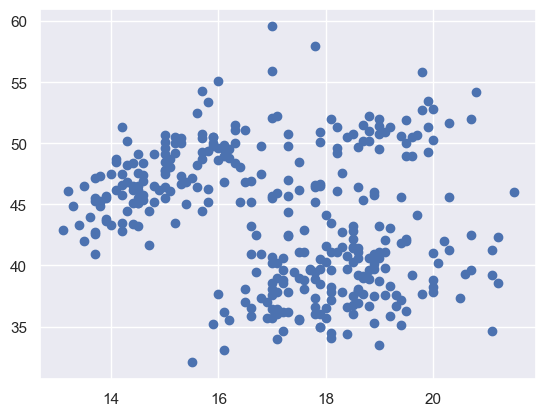

In [ ]:
#simple plot
plt.plot(bdept, blength, 'o')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


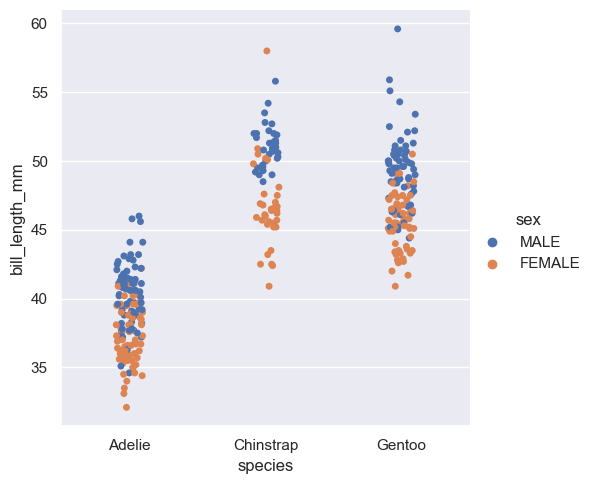

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'bill_length_mm', hue = 'sex')


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


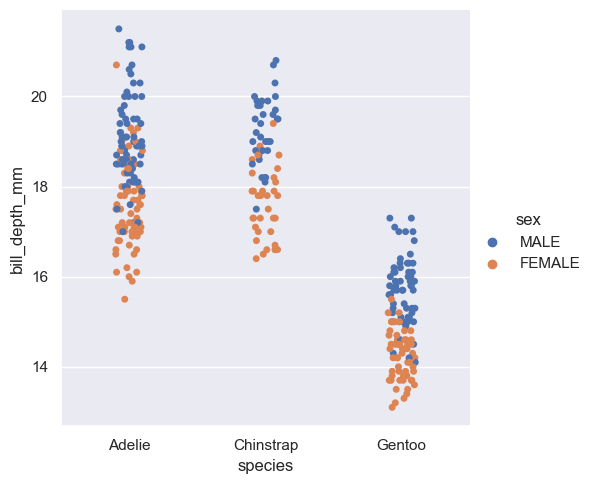

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'bill_depth_mm', hue = 'sex')



c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


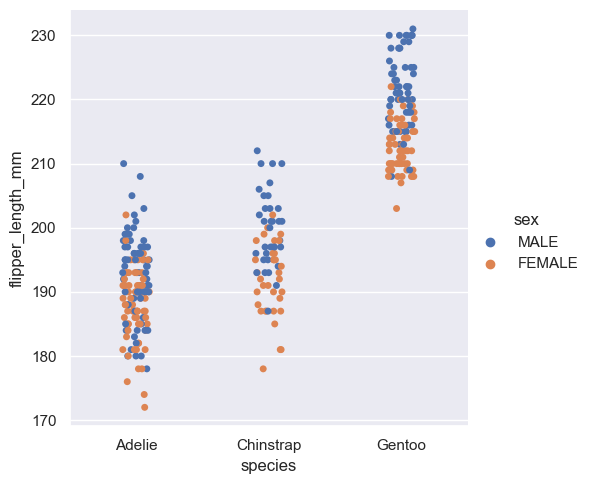

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'flipper_length_mm', hue = 'sex')

(0.0, 65.0)

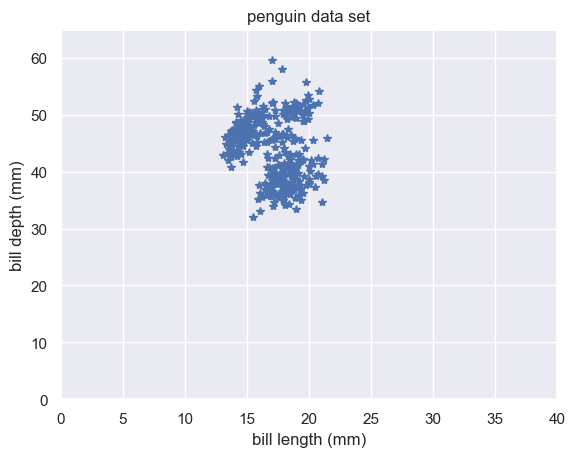

In [ ]:
#simple plot
plt.plot(bdept, blength, '*')
plt.xlabel('bill length (mm)')
plt.ylabel('bill depth (mm)')
plt.title('penguin data set')
#setting the axis limit
plt.xlim(0,40)
plt.ylim(0, 65)

(20.0, 65.0)

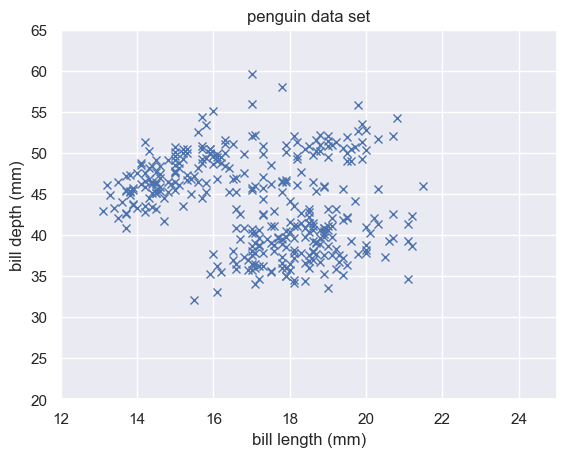

In [ ]:
#stateless
fig, ax = plt.subplots()
ax.plot(bdept, blength, 'x')
ax.set_xlabel('bill length (mm)')
ax.set_ylabel('bill depth (mm)')
ax.set_title('penguin data set')
#setting the axis limit
#x limit
ax.set_xlim(12,25)
#y limits
ax.set_ylim(20, 65)
#add best fit line




#$ is used at the beginning and at the end of the equation  to render it in mathematical equation
#y = mx + c is used to find the linear relationsship btw x and y while m and c ae constant

$ y = mx + c = p_1x^1 + p_o = p_1 x + po $

In [ ]:
#fitting a straight lin between bill lentgh and depth

m, c = np.polyfit (blength, bdept, 1)

# show 
#m, c

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
bill_length, bl_counts = penguin['bill_length_mm'].value_counts()

ValueError: too many values to unpack (expected 2)

In [ ]:
plt.bar(bill_length, bl_counts, edgecolor='black')

NameError: name 'bill_length' is not defined

In [ ]:
plt.bar(values, counts, edgecolor='black')

***
## End